# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [154]:
# if you are using google colab
from google.colab import files
files.upload()

{}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
df= pd.read_csv("/content/drive/My Drive/R9- Internal Lab/daily-minimum-temperatures-in-me.csv")

### Print the data
- First 5 rows only

In [3]:
df.head(5)

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [0]:
df=df.set_index('Date')

## Question 2

### Check the total count of null values in the data

In [5]:
df.Temperature.isna().sum()

0

In [6]:
df.Temperature.isnull().sum()

0

### Drop all the rows with null values
- use dropna() method

In [0]:
df.Temperature.dropna(inplace=True)

## Question 3

### Describe your dataframe
- use describe() method

In [8]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

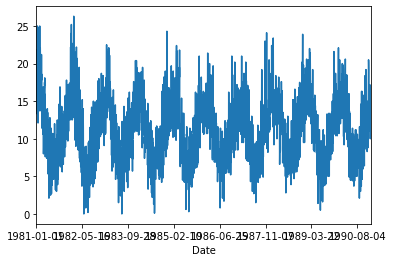

In [9]:
df.Temperature.plot()

### Get representation of the distribution of data using histogram
- use hist() method

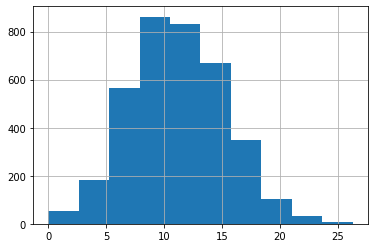

In [10]:
df.Temperature.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [11]:
df.Temperature.min()

0.0

In [12]:
df.Temperature.max()

26.3

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [13]:
#75% examples will used for training (in the begining)
train_size = int(len(df.Temperature) * 0.75)

#25% will be used for Test
test_size = len(df.Temperature - train_size)

#Split the data
train, test = df[0:train_size], df[train_size:len(df.Temperature)]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2737
test: 913


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
from sklearn.preprocessing import MinMaxScaler
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

### Print scaled train and test data
- print only first 5 values

In [15]:
print("Train data", train_scaled[0:5])

Train data [[0.78707224]
 [0.68060837]
 [0.7148289 ]
 [0.55513308]
 [0.60076046]]


In [16]:
print("Test data", test_scaled[0:5])

Test data [[0.23504274]
 [0.22649573]
 [0.18803419]
 [0.19230769]
 [0.33760684]]


## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
import numpy as np
def create_seq_data(train_scaled, look_back):
  X_train, y_train = list(), list()
  
  for day in range((len(train_scaled)-look_back)):
    X_train.append(train_scaled[day: day+look_back, 0])
    y_train.append(train_scaled[day+look_back, 0])
  return np.array(X_train), np.array(y_train)

In [0]:
import numpy as np
def create_seq_data(test_scaled, look_back):
  X_test, y_test = list(), list()
  
  for day in range((len(test_scaled)-look_back)):
    X_test.append(test_scaled[day: day+look_back, 0])
    y_test.append(test_scaled[day+look_back, 0])
  return np.array(X_test), np.array(y_test)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
look_back = 1
X_train, y_train = create_seq_data(train_scaled, look_back)
X_test, y_test = create_seq_data(test_scaled, look_back)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

### Print shape of data
- print shape of X_train and X_test

In [22]:
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [23]:
import tensorflow
batch_size=1
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(10,stateful=True,batch_input_shape=(batch_size,look_back,1)))
model.add(tensorflow.keras.layers.Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [0]:
model.compile(optimizer='adam', loss='mse')

### summarize your model
- use summary() method

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   480       
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [26]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2736 samples, validate on 912 samples
Epoch 1/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0162 - val_loss: 0.0118
Epoch 2/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0103 - val_loss: 0.0116
Epoch 3/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0122
Epoch 4/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0115
Epoch 5/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0122
Epoch 6/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0100 - val_loss: 0.0116
Epoch 7/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0119
Epoch 8/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0100 - val_loss: 0.0115
Epoch 9/50
2736/2736 [=====

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)

In [28]:
trainPredict[0]

array([0.68305665], dtype=float32)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test)

In [31]:
testPredict[0]

array([0.26888052], dtype=float32)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
testPredict = scaler.inverse_transform(testPredict)

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [0]:
from sklearn.metrics import mean_squared_error
RMSE_train=np.sqrt(mean_squared_error(y_train,trainPredict))

In [35]:
print("Train RMSE",RMSE_train)

Train RMSE 10.358333438292247


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [0]:
RMSE_test=np.sqrt(mean_squared_error(y_test,testPredict))

In [38]:
print("Test RMSE",RMSE_train)

Test RMSE 11.089324387197637
